[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


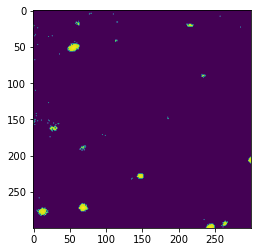

In [1]:
from astropy.io import fits
import matplotlib.pyplot as plt

hdulist= fits.open('./A1_mosaic.fits')
data = hdulist[0].data
data_small = data[200:500,200:500]

for array in data_small:
  for idx, x in enumerate(array):
    if x < 3481:
      array[idx] = 0
# return data_small

plt.imshow(data_small)
print(data_small)

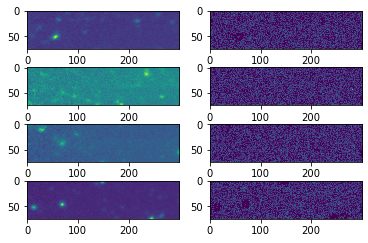

<function scipy.ndimage.measurements.label(input, structure=None, output=None)>

In [3]:
import numpy as np
from scipy.ndimage.filters import maximum_filter
import scipy
from scipy.ndimage.morphology import generate_binary_structure, binary_erosion
import matplotlib.pyplot as pp

#for some reason I had to reshape. Numpy ignored the shape header.
#paws_data = np.loadtxt("paws.txt").reshape(4,11,14)

#getting a list of images
paws = [p.squeeze() for p in np.vsplit(data_small,4)]


def detect_peaks(image):
    """
    Takes an image and detect the peaks usingthe local maximum filter.
    Returns a boolean mask of the peaks (i.e. 1 when
    the pixel's value is the neighborhood maximum, 0 otherwise)
    """

    # define an 8-connected neighborhood
    neighborhood = generate_binary_structure(2,2)

    #apply the local maximum filter; all pixel of maximal value 
    #in their neighborhood are set to 1
    local_max = maximum_filter(image, footprint=neighborhood)==image
    #local_max is a mask that contains the peaks we are 
    #looking for, but also the background.
    #In order to isolate the peaks we must remove the background from the mask.

    #we create the mask of the background
    background = (image==0)

    #a little technicality: we must erode the background in order to 
    #successfully subtract it form local_max, otherwise a line will 
    #appear along the background border (artifact of the local maximum filter)
    eroded_background = binary_erosion(background, structure=neighborhood, border_value=1)

    #we obtain the final mask, containing only peaks, 
    #by removing the background from the local_max mask (xor operation)
    detected_peaks = local_max ^ eroded_background

    return detected_peaks


#applying the detection and plotting results
for i, paw in enumerate(paws):
    detected_peaks = detect_peaks(paw)
    pp.subplot(4,2,(2*i+1))
    pp.imshow(paw)
    pp.subplot(4,2,(2*i+2) )
    pp.imshow(detected_peaks)

pp.show()
scipy.ndimage.measurements.label

[findpeaks] >Finding peaks in 2d-array using mask method..
[findpeaks] >Scaling image between [0-255] and to uint8
[findpeaks] >Conversion to gray image.
[findpeaks] >WARNING: Conversion to gray not possible.
[findpeaks] >Denoising with [fastnl], window: [3].
[findpeaks] >Detect peaks using the mask method with limit=0.
[findpeaks] >Fin.


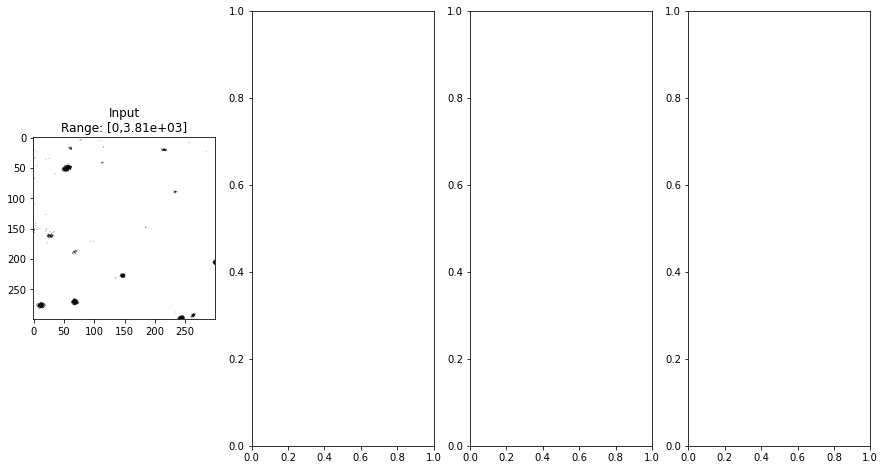

[findpeaks] >Scaling image between [0-255] and to uint8
[findpeaks] >Conversion to gray image.
[findpeaks] >WARNING: Conversion to gray not possible.
[findpeaks] >Denoising with [fastnl], window: [3].


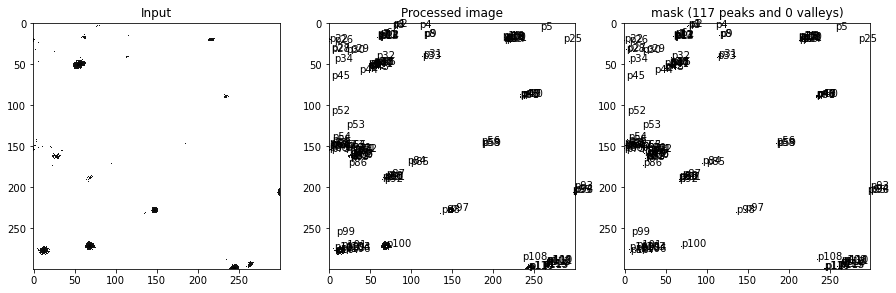

[findpeaks] >Finding peaks in 2d-array using mask method..
[findpeaks] >Resizing image to (500, 100).
[findpeaks] >Scaling image between [0-255] and to uint8
[findpeaks] >Conversion to gray image.
[findpeaks] >WARNING: Conversion to gray not possible.
[findpeaks] >Denoising with [10], window: [3].
[findpeaks] >Detect peaks using the mask method with limit=0.
[findpeaks] >Fin.


{'Xraw': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint16),
 'Xproc': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'Xdetect': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]]),
 'Xranked': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
      

In [10]:
from findpeaks import findpeaks

# Initialize
fp = findpeaks(method='mask')
# Fit
fp.fit(data_small)

# Plot the pre-processing steps
fp.plot_preprocessing()
# Plot all
fp.plot()

# Initialize
fp = findpeaks(method='mask', scale=True, denoise=10, togray=True, imsize=(500,100), verbose=3)
# Fit
fp.fit(data_small)

[findpeaks] >Finding peaks in 2d-array using mask method..
[findpeaks] >Scaling image between [0-255] and to uint8
[findpeaks] >Conversion to gray image.
[findpeaks] >WARNING: Conversion to gray not possible.
[findpeaks] >Denoising with [fastnl], window: [3].
[findpeaks] >Detect peaks using the mask method with limit=0.
[findpeaks] >Fin.
[findpeaks] >Plotting 3d-mesh..


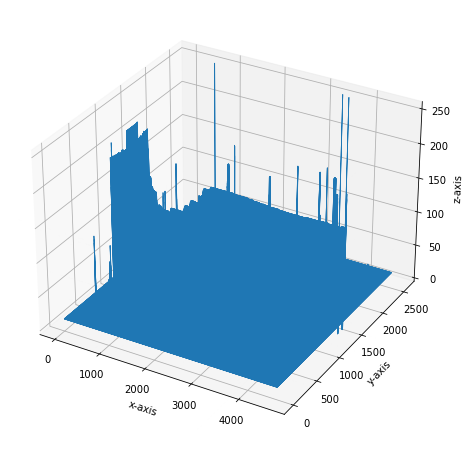

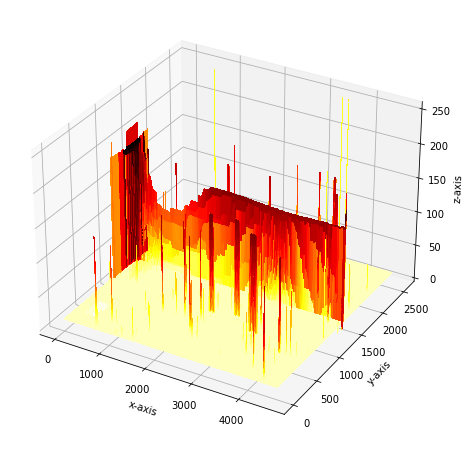

(<Axes3DSubplot:xlabel='x-axis', ylabel='y-axis'>,
 <Axes3DSubplot:xlabel='x-axis', ylabel='y-axis'>)

In [7]:
from findpeaks import findpeaks
fp = findpeaks(method='mask')
# Fit
fp.fit(data)
fp.plot_mesh()